In [250]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import f_oneway


In [192]:
df = pd.read_csv('hotel_bookings.csv')

In [193]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [194]:
df.shape

(119390, 32)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 1.  Data Cleaning and Preprocessing


## Missing Value :

In [196]:
df.isna().value_counts().sum()

119390

In [197]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)


company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# 

## duplicate_values :

In [198]:
duplicate_values = df.duplicated().sum()

In [199]:
duplicate_values

31994

### Summary statistics for numeric column :

In [200]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Making copy of data :

In [201]:
df_copy = df.copy()

## 

## Type Casting of Data :

### 1] reservation_status_date : changing data type object ---> datetime .

In [202]:
df.reservation_status_date = pd.to_datetime(df.reservation_status_date)  # reservation_status_date : string to datetime 

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

## 

## 2] Converting the object(String) data type to category datatype 

In [204]:
cat_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel',
            'reserved_room_type', 'assigned_room_type', 'deposit_type',
            'customer_type', 'reservation_status', 'country']

for col in cat_cols:
    df[col] = df[col].astype('category')


# 

### 3 ] creating filled for future usage : ( if needed)

In [205]:
# Create new time-related features
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day_of_week'] = df['reservation_status_date'].dt.day_name()


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  category      
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

## 

## Handling Missing Values :

In [207]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values']>0].sort_values(by='Percentage', ascending=False)

missing_df


,Missing Values,Percentage
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


In [208]:
df.children.describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [209]:
df.children.median()

0.0

#### Fill the null vlaue of children :

In [210]:
df.children.fillna(0,inplace=True)

In [211]:
df.children.info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: children
Non-Null Count   Dtype  
--------------   -----  
119390 non-null  float64
dtypes: float64(1)
memory usage: 932.9 KB


# 

### Filling the null value of agent : But agent cloum contain id of agent so taking mean of that is not effective .

In [212]:
df.agent.describe()

count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

In [213]:
df.agent.fillna(0, inplace = True)

In [214]:
df.agent = df.agent.astype(int)

In [215]:
df.agent.info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: agent
Non-Null Count   Dtype
--------------   -----
119390 non-null  int32
dtypes: int32(1)
memory usage: 466.5 KB


# 

## Filling the Country null value :

In [216]:
df.country.mode()

0    PRT
Name: country, dtype: category
Categories (177, object): ['ABW', 'AGO', 'AIA', 'ALB', ..., 'VNM', 'ZAF', 'ZMB', 'ZWE']

In [217]:
df1 = df.copy()  # making copy for safety incase ( unchanged counrty and company )

In [218]:
df.country.fillna('PRT',inplace=True) 

In [219]:
df.country.info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: country
Non-Null Count   Dtype   
--------------   -----   
119390 non-null  category
dtypes: category(1)
memory usage: 238.8 KB


## 

### Droping the Company Column : Due to large no. of null .

In [220]:
df.drop('company',axis=1, inplace= True)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  category      
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

### Featur Engineering :
- In short clustering the column 
- Converting Raw data into to a single set for better accuracy / predictive analysis.

In [222]:
df['Total_stay']= df.stays_in_weekend_nights + df.stays_in_week_nights            

In [223]:
df['Total_guests'] = df.adults + df.children + df.babies 

In [224]:
df['Room_upgrade'] = (df['reserved_room_type'].astype(str) != df['assigned_room_type'].astype(str)).astype(int)


### Outliers :

In [225]:
df[['adr', 'lead_time', 'Total_stay']].describe()


,adr,lead_time,Total_stay
count,119390.000000,119390.000000,119390.000000
mean,101.831122,104.011416,3.427900
std,50.535790,106.863097,2.557439
min,-6.380000,0.000000,0.000000
25%,69.290000,18.000000,2.000000
50%,94.575000,69.000000,3.000000
75%,126.000000,160.000000,4.000000
max,5400.000000,737.000000,69.000000


In [226]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# View outliers
outliers = df[(df['adr'] < lower_bound) | (df['adr'] > upper_bound)]
print(f"Outlier count in ADR: {outliers.shape[0]}")


Outlier count in ADR: 3793


## Handling outlier for [ ' adr ' ]:

In [227]:
df.adr = df.adr.clip(lower = 0 , upper = upper_bound)

In [228]:
df.adr.describe()

count    119390.000000
mean        100.659358
std          44.688822
min           0.000000
25%          69.290000
50%          94.575000
75%         126.000000
max         211.065000
Name: adr, dtype: float64

## 

In [229]:
Q1 = df.lead_time.quantile(0.25)
Q3 = df.lead_time.quantile(0.75)
IQR = Q3 - Q1 

# define outliers 
lb = Q1 - 1.5* IQR 
ub = Q3 + 1.5* IQR 

# count the no. of outlier in lead_time
outlier_lead_time = df[(df.lead_time < lb) | (df.lead_time > ub)]
outlier_lead_time.shape

(3005, 37)

In [230]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,year,month,Total_stay,Total_guests,Room_upgrade
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,...,74.828319,2.321149,100.659358,0.062518,0.571363,2016.093743,6.334123,3.427900,1.968239,0.124943
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,...,107.141953,17.594721,44.688822,0.245291,0.792798,0.715306,3.346352,2.557439,0.722394,0.330656
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,7.000000,0.000000,69.290000,0.000000,0.000000,2016.000000,3.000000,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,9.000000,0.000000,94.575000,0.000000,0.000000,2016.000000,6.000000,3.000000,2.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,152.000000,0.000000,126.000000,0.000000,1.000000,2017.000000,9.000000,4.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,535.000000,391.000000,211.065000,8.000000,5.000000,2017.000000,12.000000,69.000000,55.000000,1.000000


# --------------------------------------------------------------------------------

# 2. 📊 Exploratory Data Analysis


## 

## Univariate analysis :

Text(0.5, 1.0, 'Distribution  of ADR')

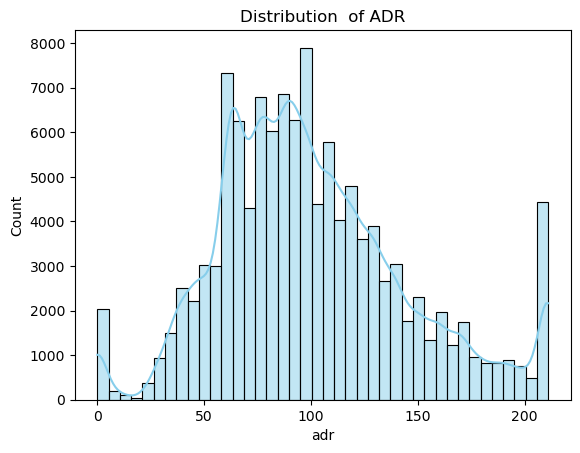

In [231]:
sns.histplot(df['adr'], bins=40 ,kde = True, color='skyblue')
plt.title("Distribution  of ADR")



Text(0.5, 1.0, 'Distribution of Lead Time')

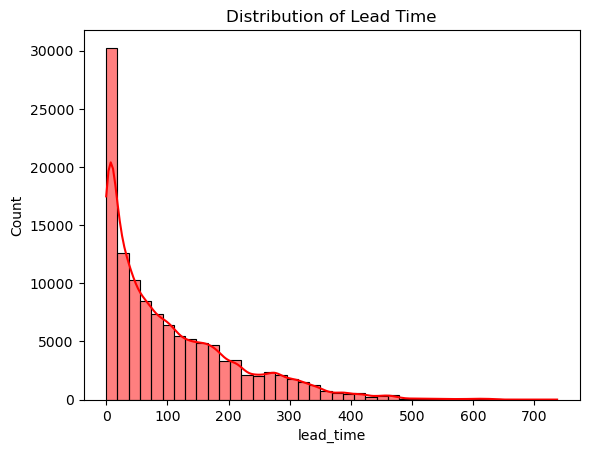

In [232]:
sns.histplot(df['lead_time'], kde=True, bins=40, color='red')
plt.title("Distribution of Lead Time")

Text(0.5, 1.0, 'Hotel Type Distribution')

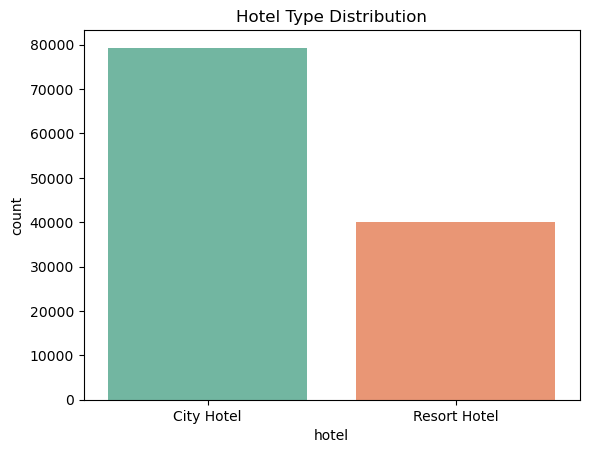

In [233]:
sns.countplot(x='hotel', data=df, palette='Set2')
plt.title("Hotel Type Distribution")


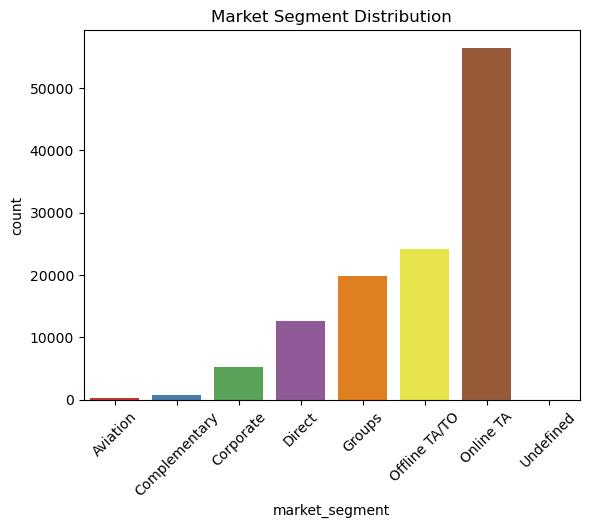

In [234]:
sns.countplot(x='market_segment', data=df, palette='Set1')
plt.title("Market Segment Distribution")
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Customer Type Distribution')

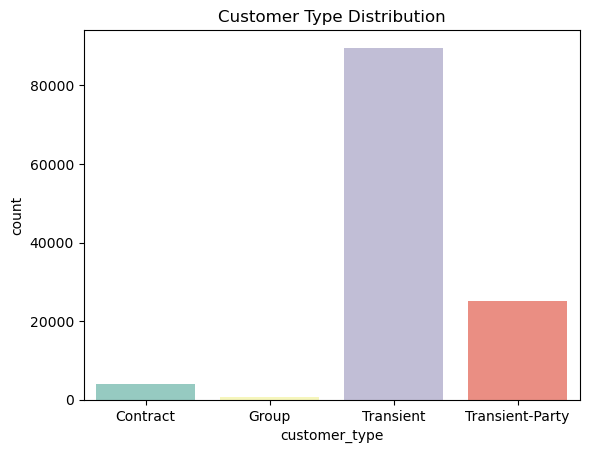

In [235]:
sns.countplot(x='customer_type', data=df, palette='Set3')
plt.title("Customer Type Distribution")


Text(0.5, 1.0, 'Reservation Status Distribution')

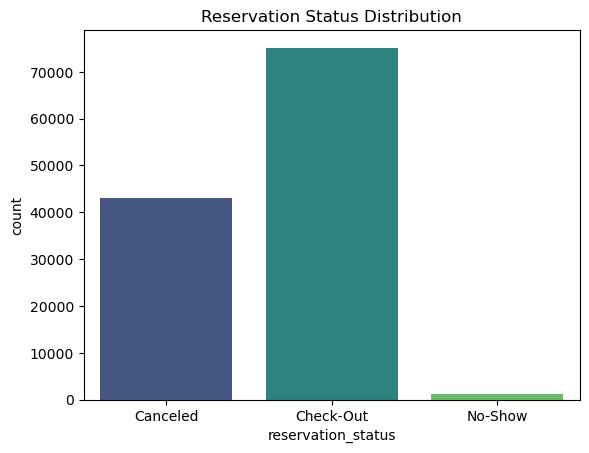

In [236]:
sns.countplot(x='reservation_status', data=df, palette='viridis')
plt.title("Reservation Status Distribution")


#### time-series plot :

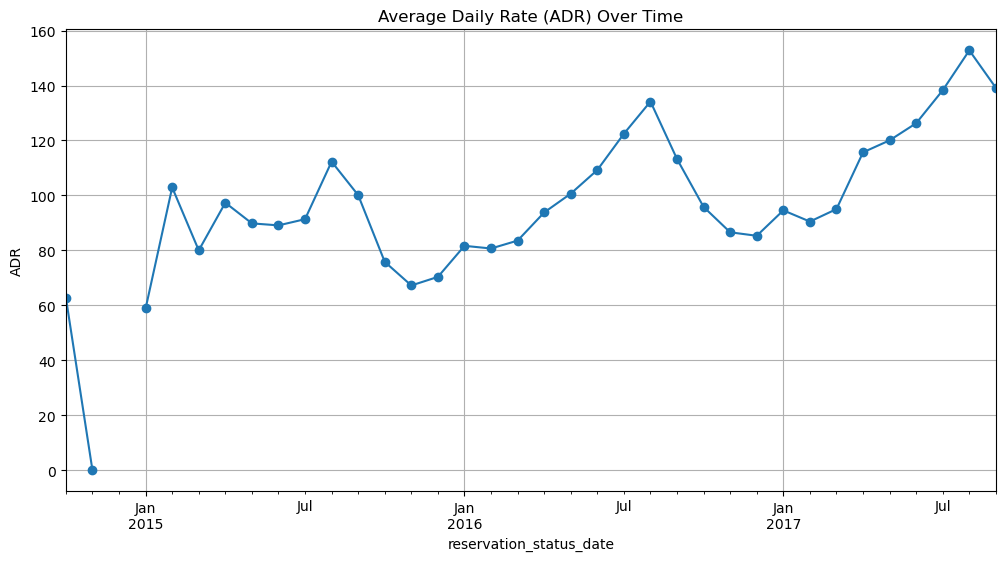

In [237]:

monthly_adr = df.set_index('reservation_status_date')['adr'].resample('M').mean()

monthly_adr.plot(figsize=(12,6),marker='o', title='Average Daily Rate (ADR) Over Time')
plt.ylabel('ADR')
plt.grid(True)

# 

# Bi-varient Analysis :

### 1] hotel vs ADR

Text(0.5, 1.0, 'ADR by hotel type')

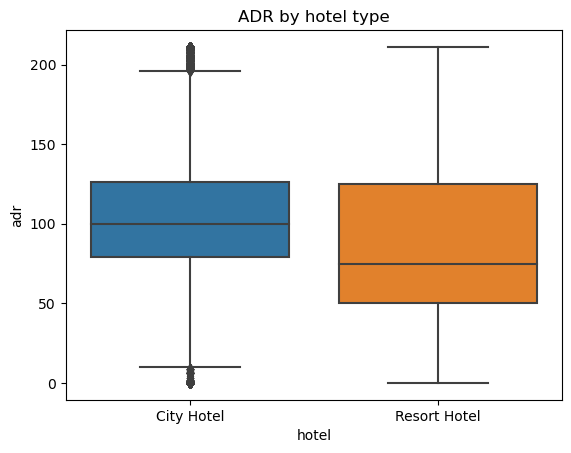

In [238]:
sns.boxplot(x= 'hotel', y='adr',data=df)
plt.title('ADR by hotel type')

### 2] market_sgment vs ADR 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

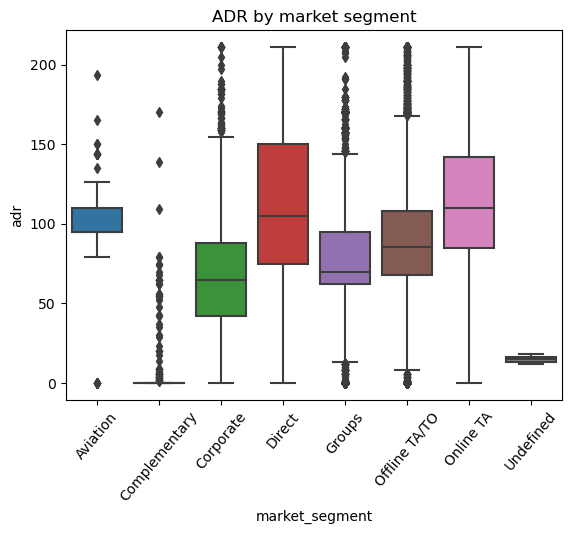

In [239]:
sns.boxplot(x= 'market_segment' , y= 'adr', data = df)
plt.title('ADR by market segment')
plt.xticks(rotation=50)

### 3] Customer type vs ADR :

Text(0.5, 1.0, 'ADR by customer_type')

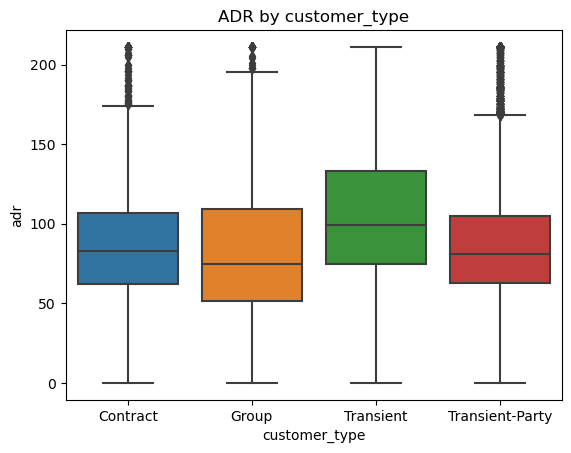

In [240]:
sns.boxplot(x= 'customer_type', y= 'adr', data= df)
plt.title('ADR by customer_type')

# Multivarient analysis :

## 🔹 1. ADR by Hotel and Customer Type



<Figure size 1500x2000 with 0 Axes>

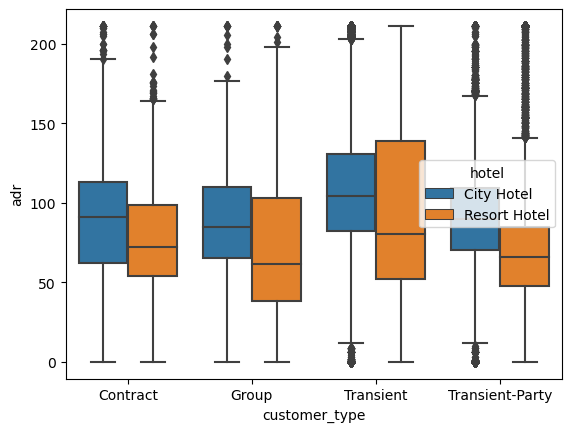

<Figure size 1500x2000 with 0 Axes>

In [241]:
sns.boxplot(x='customer_type', y='adr',hue= 'hotel', data=df)
plt.figure(figsize=(15, 20)) 

# 

## 🔹 2. ADR by Hotel and market_segment


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

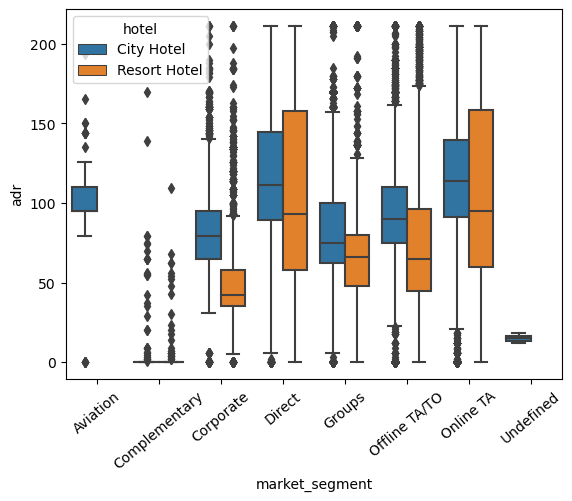

In [242]:
sns.boxplot( x= 'market_segment', y= 'adr', hue='hotel', data=df)
plt.xticks(rotation=40)

# --------------------------------------------------------------------------------

# 3. Correlation Analysis :

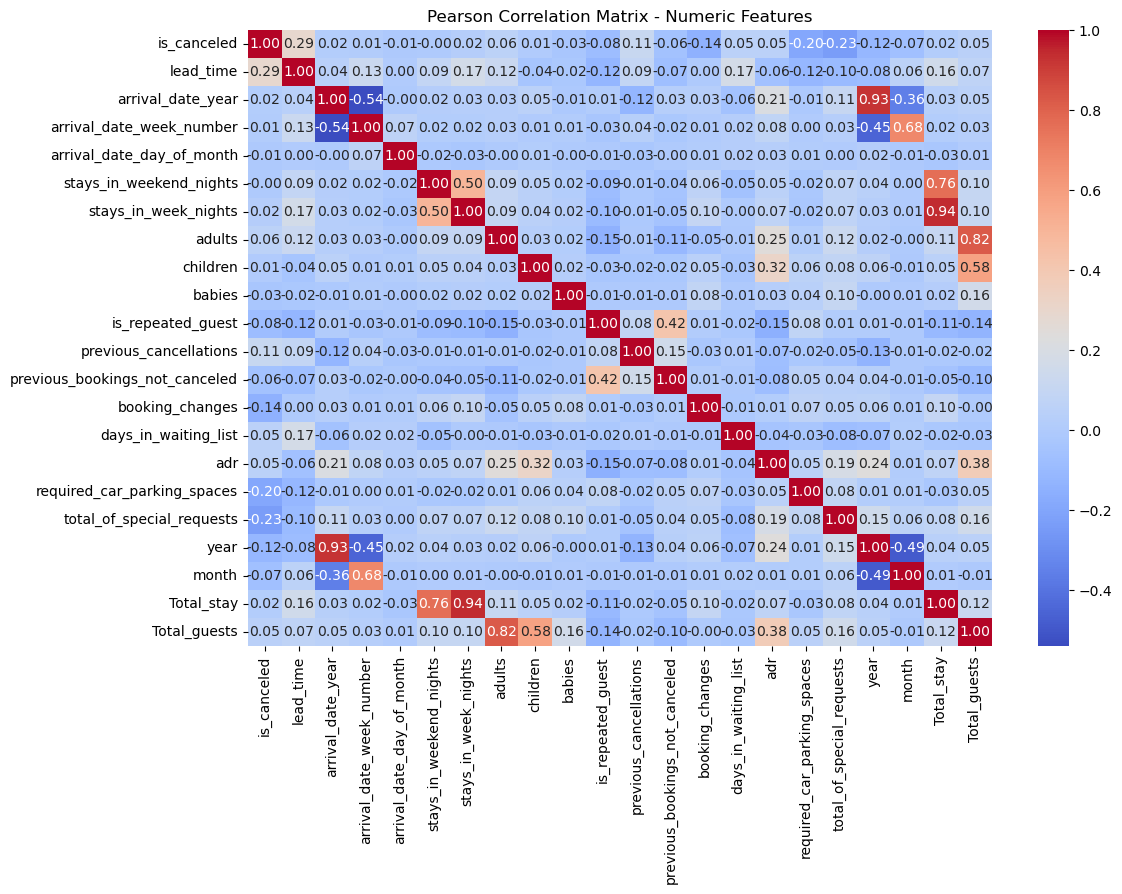

In [243]:

# 1. Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 2. Compute Pearson correlation matrix
corr_matrix = df[numeric_cols].corr(method='pearson')

# 3. Visualize correlation matrix using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Matrix - Numeric Features')
plt.show()

In [244]:
# 4. Explore correlations of adr with lead_time, special_requests, and booking_changes

print("Correlation of adr with lead_time:", df['adr'].corr(df['lead_time']))

print("Correlation of adr with total_of_special_requests:", df['adr'].corr(df['total_of_special_requests']))

print("Correlation of adr with booking_changes:", df['adr'].corr(df['booking_changes']))

Correlation of adr with lead_time: -0.06298505148609342
Correlation of adr with total_of_special_requests: 0.1857139361302893
Correlation of adr with booking_changes: 0.014527842945229234


# --------------------------------------------------------------------------------

# 4.  Hypothesis Testing


# 1.

### H0: There is no difference in ADR between bookings made through Online TA and Direct channels


In [245]:
 from scipy.stats import ttest_ind

ta_adr = df[df['distribution_channel'] == 'TA/TO']['adr']
direct_adr = df[df['distribution_channel'] == 'Direct']['adr']

t_stat1, p_val1 = ttest_ind(ta_adr, direct_adr, equal_var=False)
print("Test 1 - ADR vs Channel")
print(f"T-statistic: {t_stat1:.3f}, p-value: {p_val1:.4f}")


Test 1 - ADR vs Channel
T-statistic: -3.652, p-value: 0.0003


## 2.

### H0: Room upgrades are independent of lead time

In [249]:
from scipy.stats import ttest_ind

df['is_upgraded'] = df['assigned_room_type'].astype(str) != df['reserved_room_type'].astype(str)
lead_upgraded = df[df['is_upgraded']]['lead_time']
lead_not_upgraded = df[~df['is_upgraded']]['lead_time']

t_stat2, p_val2 = ttest_ind(lead_upgraded, lead_not_upgraded, equal_var=False)

print("Test 2 - Lead Time vs Upgrade")
print(f"T-statistic: {t_stat2:.3f}, p-value: {p_val2:.4f}")


Test 2 - Lead Time vs Upgrade
T-statistic: -59.575, p-value: 0.0000


# 3.

### H0: Average stay duration does not differ between customer types


In [248]:
from scipy.stats import f_oneway

df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

grouped_stay = [group['stay_duration'].values for _, group in df.groupby('customer_type')]

f_stat3, p_val3 = f_oneway(*grouped_stay)
print("Test 3 - Stay Duration vs Customer Type")
print(f"F-statistic: {f_stat3:.3f}, p-value: {p_val3:.4f}")


Test 3 - Stay Duration vs Customer Type
F-statistic: 945.462, p-value: 0.0000


# --------------------------------------------------------------------------------

# 5.  Key Business Questions

#### What influences ADR the most?

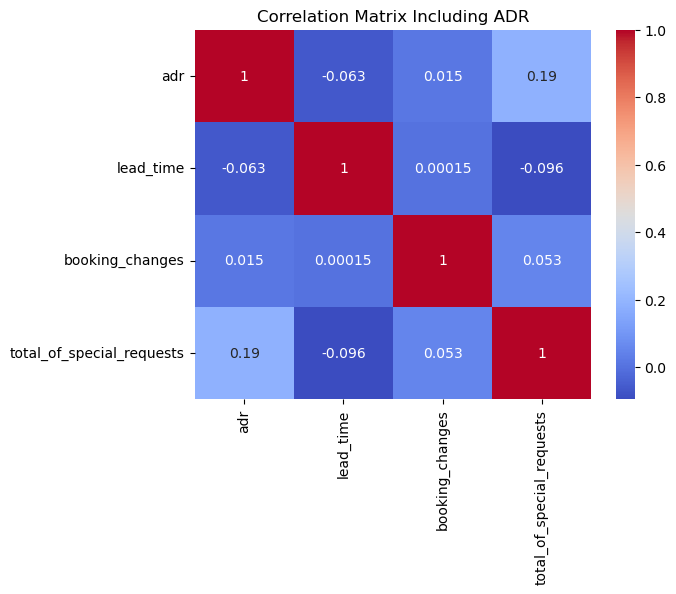

In [288]:
# Correlation heatmap for numeric features including 'adr'
corr = df[['adr', 'lead_time', 'booking_changes', 'total_of_special_requests']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Including ADR')
plt.show()


#### Do guests who book earlier tend to request more changes?

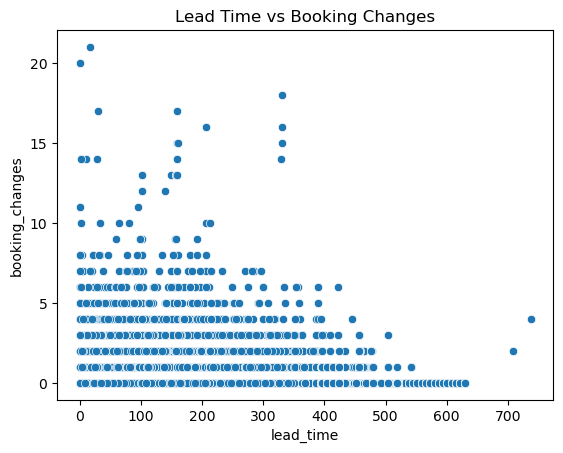

In [289]:
sns.scatterplot(data=df, x='lead_time', y='booking_changes')
plt.title('Lead Time vs Booking Changes')
plt.show()


#### Are there pricing or booking differences across countries?

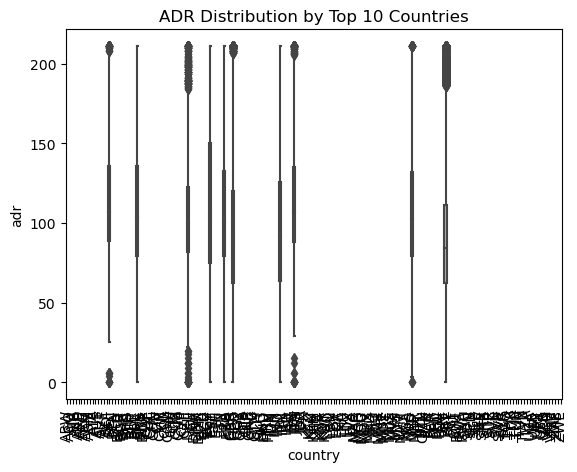

In [290]:
top_countries = df['country'].value_counts().head(10).index
sns.boxplot(data=df[df['country'].isin(top_countries)], x='country', y='adr')
plt.xticks(rotation=90)
plt.title('ADR Distribution by Top 10 Countries')
plt.show()


#### Is there a pattern in room upgrades or reassignment?

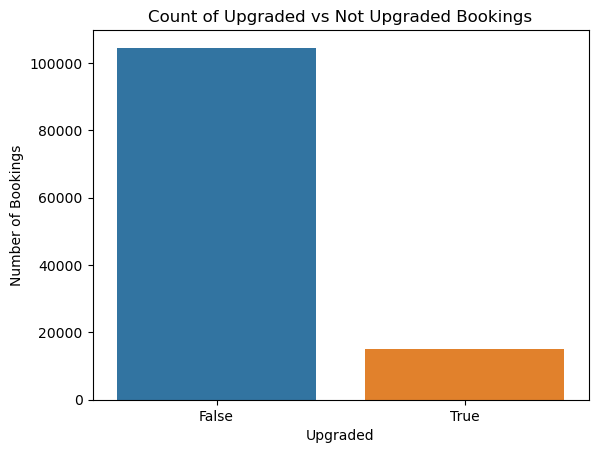

In [291]:
df['is_upgraded'] = df['assigned_room_type'].astype(str) != df['reserved_room_type'].astype(str)
upgrade_counts = df['is_upgraded'].value_counts()
sns.barplot(x=upgrade_counts.index, y=upgrade_counts.values)
plt.title('Count of Upgraded vs Not Upgraded Bookings')
plt.xlabel('Upgraded')
plt.ylabel('Number of Bookings')
plt.show()


#### Are reserved room types consistently matched with assigned room types?

In [292]:
match_percent = (df['is_upgraded'] == False).mean() * 100
print(f"Percentage of bookings where reserved room matches assigned room: {match_percent:.2f}%")


Percentage of bookings where reserved room matches assigned room: 87.51%


#### What are the most common guest demographics (e.g., group size, nationality)?

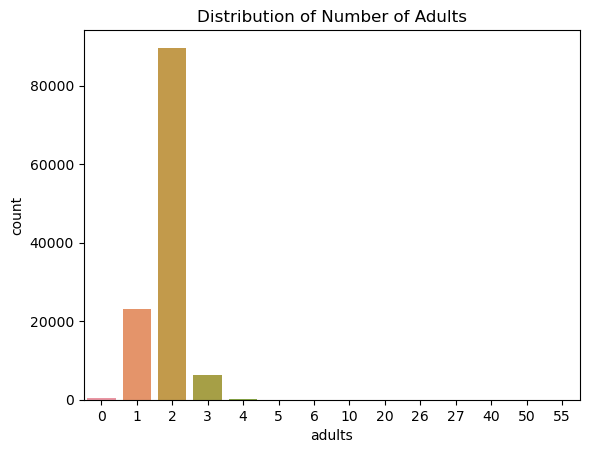

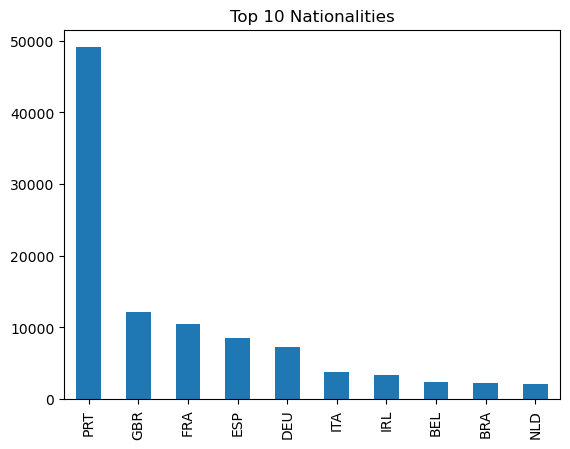

In [293]:
sns.countplot(x='adults', data=df)
plt.title('Distribution of Number of Adults')
plt.show()

top_nationalities = df['country'].value_counts().head(10)
top_nationalities.plot(kind='bar')
plt.title('Top 10 Nationalities')
plt.show()


#### Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior? 

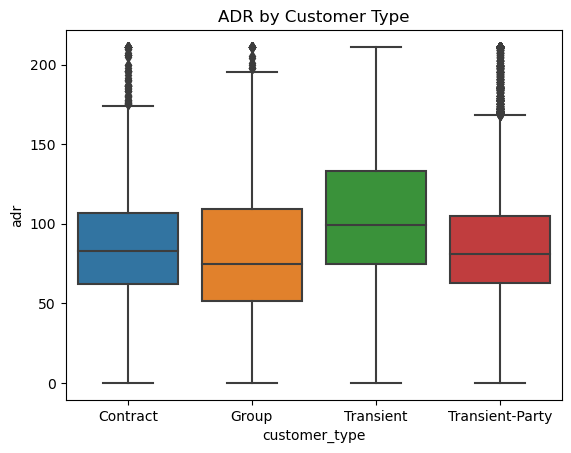

In [294]:
sns.boxplot(data=df, x='customer_type', y='adr')
plt.title('ADR by Customer Type')
plt.show()


#### How does booking lead time vary across customer types and countries?

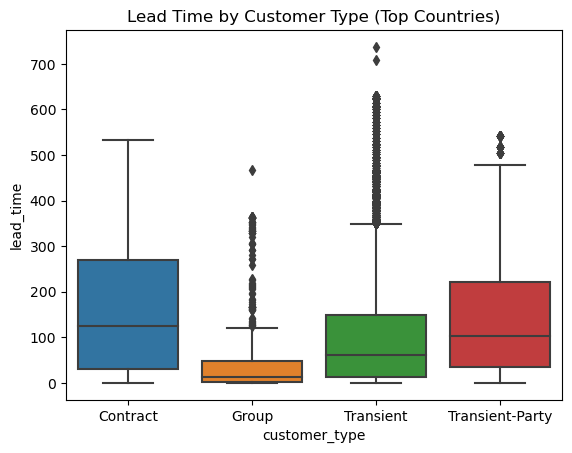

In [295]:
sns.boxplot(data=df[df['country'].isin(top_countries)], x='customer_type', y='lead_time')
plt.title('Lead Time by Customer Type (Top Countries)')
plt.show()


#### Are longer lead times associated with fewer booking changes or cancellations?

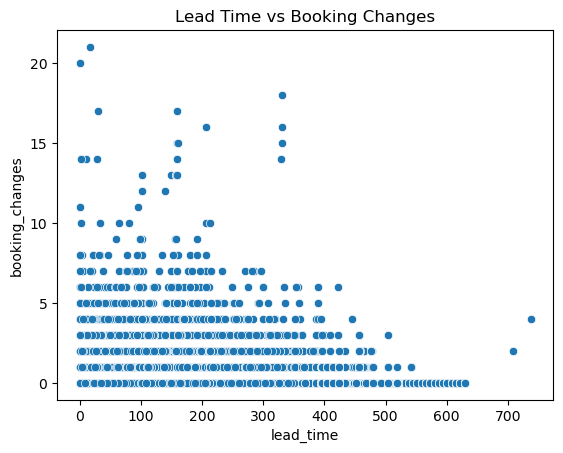

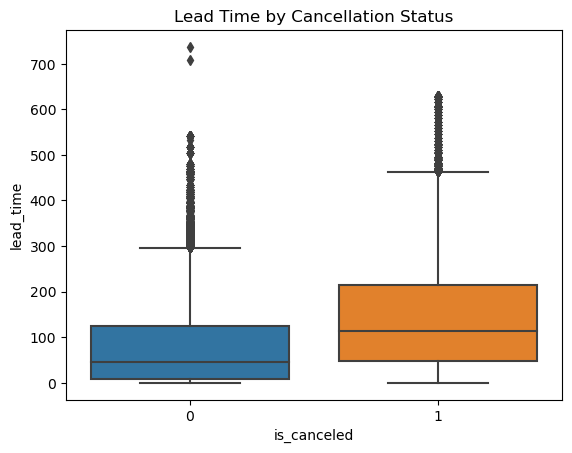

In [296]:
sns.scatterplot(data=df, x='lead_time', y='booking_changes')
plt.title('Lead Time vs Booking Changes')
plt.show()

sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Lead Time by Cancellation Status')
plt.show()


#### What is the typical duration of stay, and how does it vary by customer type or segment?

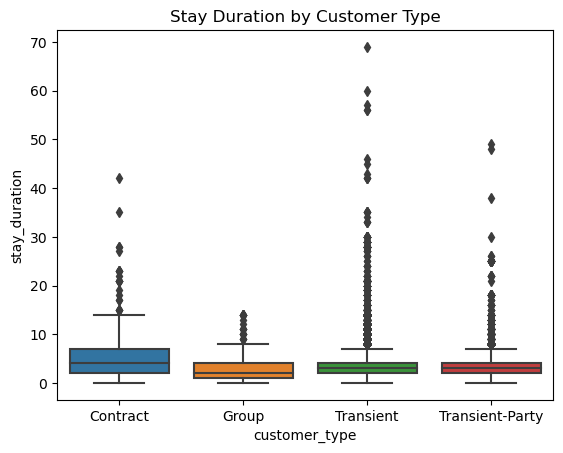

In [297]:
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
sns.boxplot(data=df, x='customer_type', y='stay_duration')
plt.title('Stay Duration by Customer Type')
plt.show()


#### How often are guests upgraded or reassigned to a different room type?

In [298]:
upgrade_rate = df['is_upgraded'].mean() * 100
print(f"Upgrade rate: {upgrade_rate:.2f}%")


Upgrade rate: 12.49%


#### Are guests who make special requests more likely to experience booking changes or longer stays?

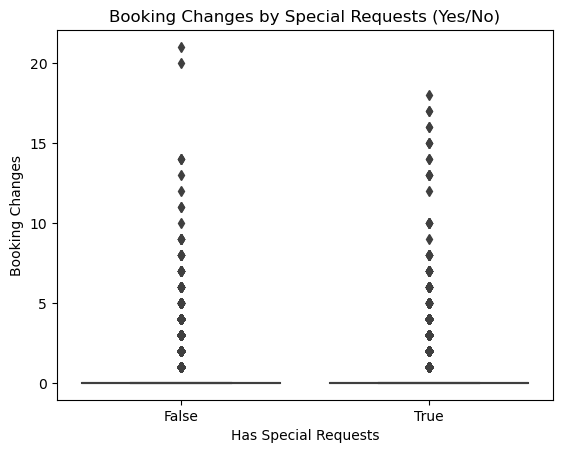

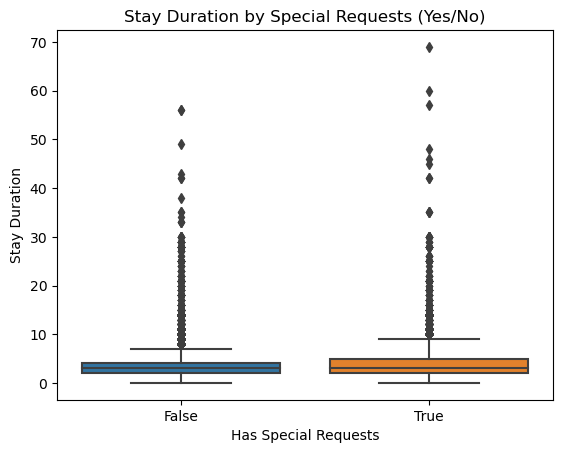

In [299]:
# Plot 1
sns.boxplot(x=(df['total_of_special_requests'] > 0), y=df['booking_changes'])
plt.title('Booking Changes by Special Requests (Yes/No)')
plt.xlabel('Has Special Requests')
plt.ylabel('Booking Changes')
plt.show()

# Plot 2
sns.boxplot(x=(df['total_of_special_requests'] > 0), y=df['stay_duration'])
plt.title('Stay Duration by Special Requests (Yes/No)')
plt.xlabel('Has Special Requests')
plt.ylabel('Stay Duration')
plt.show()


#### Do certain market segments or distribution channels show higher booking consistency or revenue?

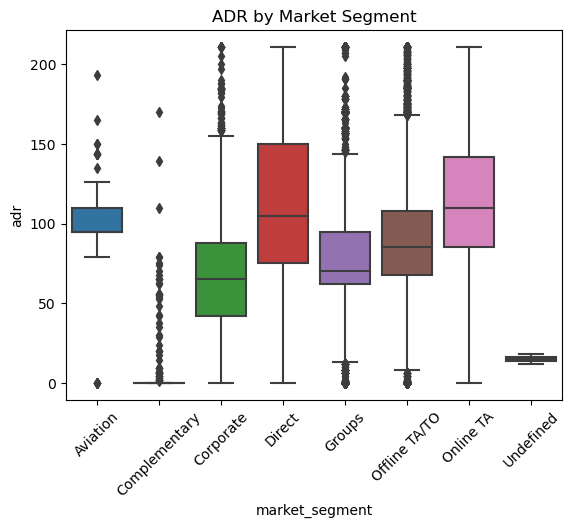

In [300]:
sns.boxplot(data=df, x='market_segment', y='adr')
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()


#### What factors are most strongly associated with higher ADR?

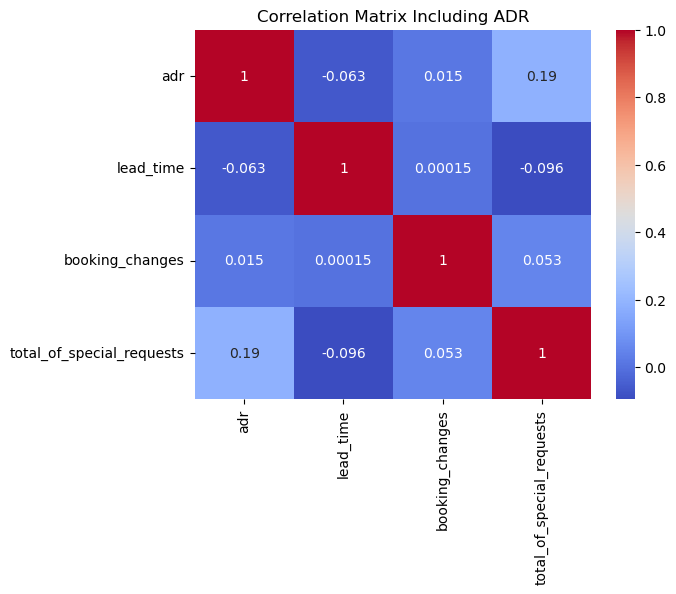

In [301]:
corr = df[['adr', 'lead_time', 'booking_changes', 'total_of_special_requests']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Including ADR')
plt.show()

#### Are there customer types or segments consistently contributing to higher revenue?

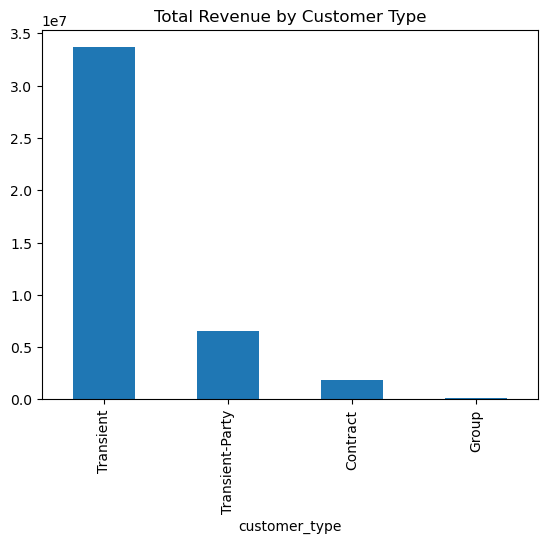

In [302]:
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])
revenue_by_customer_type = df.groupby('customer_type')['revenue'].sum().sort_values(ascending=False)
revenue_by_customer_type.plot(kind='bar')
plt.title('Total Revenue by Customer Type')
plt.show()


#### Do bookings with more lead time or from specific countries yield higher ADR?

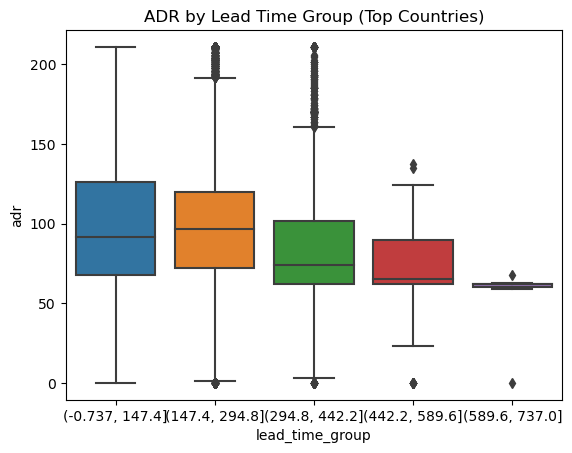

In [303]:
df['lead_time_group'] = pd.cut(df['lead_time'], bins=5)
sns.boxplot(data=df[df['country'].isin(top_countries)], x='lead_time_group', y='adr')
plt.title('ADR by Lead Time Group (Top Countries)')
plt.show()


#### Are guests with higher ADR more likely to request special services or make booking modifications?

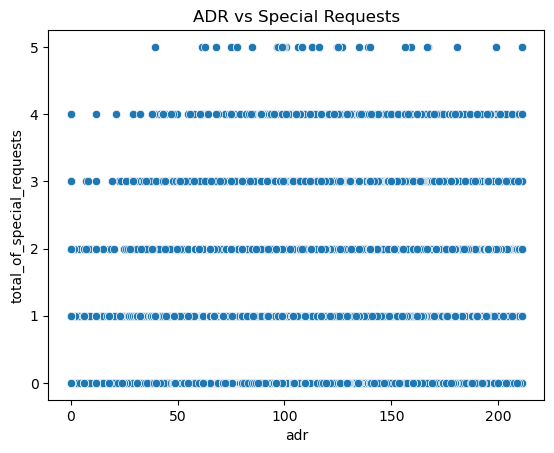

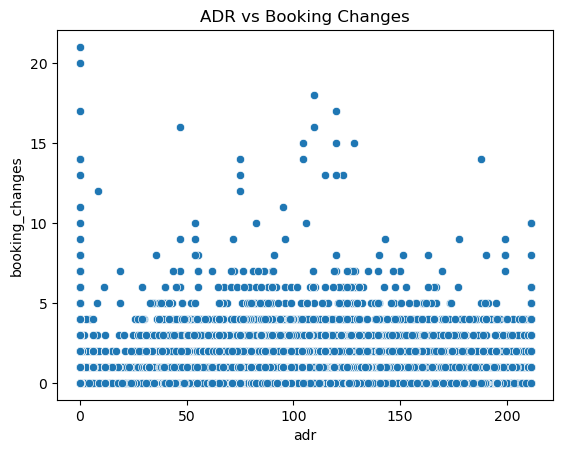

In [304]:
sns.scatterplot(data=df, x='adr', y='total_of_special_requests')
plt.title('ADR vs Special Requests')
plt.show()

sns.scatterplot(data=df, x='adr', y='booking_changes')
plt.title('ADR vs Booking Changes')
plt.show()


#### Do guests from different countries behave differently in terms of booking timing or stay length?

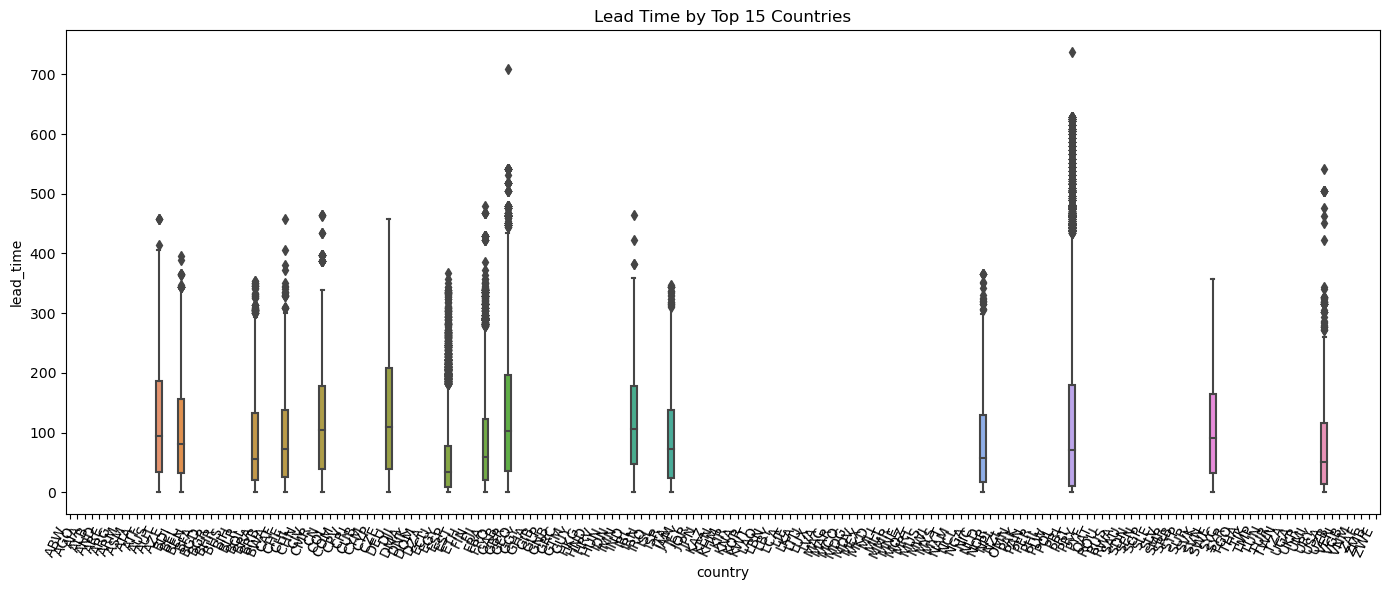

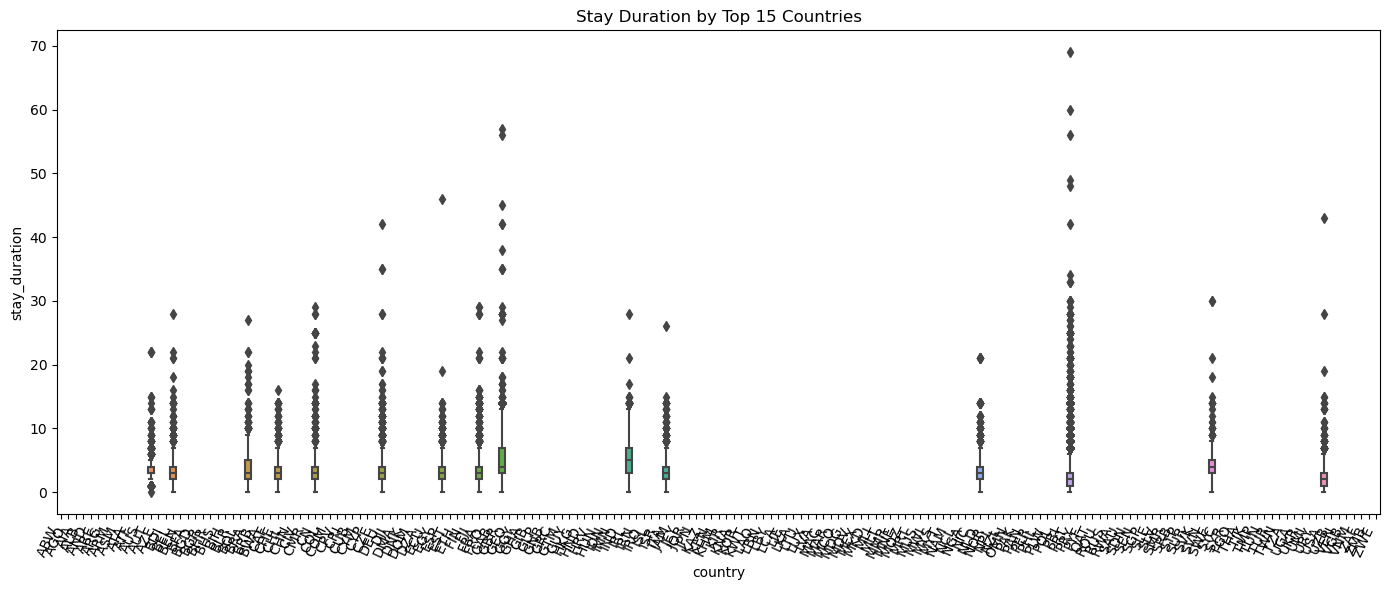

In [305]:
# Top 15 countries by booking count
top_countries = df['country'].value_counts().head(15).index
df_top = df[df['country'].isin(top_countries)].copy()
df_top['stay_duration'] = df_top['stays_in_weekend_nights'] + df_top['stays_in_week_nights']

# Plotting
for col, title in zip(['lead_time', 'stay_duration'], ['Lead Time', 'Stay Duration']):
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df_top, x='country', y=col)
    plt.title(f'{title} by Top 15 Countries')
    plt.xticks(rotation=65, ha='right')
    plt.tight_layout()
    plt.show()


#### Are guests who make booking changes more likely to request additional services or cancel?

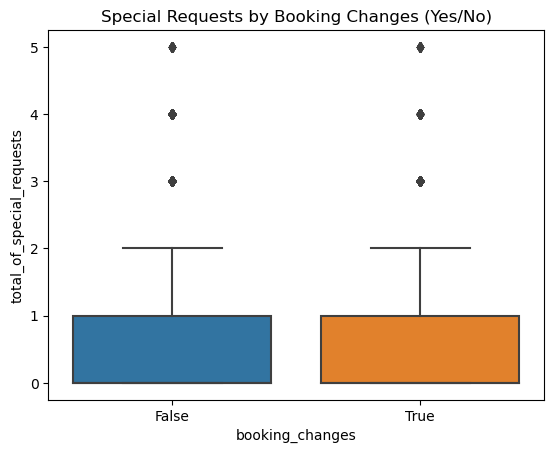

is_canceled,0,1
booking_changes,,
False,0.591458,0.408542
True,0.843273,0.156727


In [306]:
sns.boxplot(x=df['booking_changes'] > 0, y=df['total_of_special_requests'])
plt.title('Special Requests by Booking Changes (Yes/No)')
plt.show()

pd.crosstab(df['booking_changes'] > 0, df['is_canceled'], normalize='index')
